In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.patches as mpatches
from sklearn.metrics import silhouette_score

### Clustering

The file `data/activity.csv` contains data from wearable devices (Fitbit-like)  measured from 62 individuals recorded during a 5 minutes time interval. These inidividuals were engaged in a small subset of activities (i.e., sleeping, running, or walking), but we are not provided any information about these activities not about the individuals who were engaged in the same activities (ex. running)

In this exercise, you will use `k-means` clustering algorithm to cluster the time series data. The objective is to identify the number of activities represented in this dataset, and the clusters of individuals that were involved in the same activities.  

Important: the dataset contains data from two cohorts. Unfortunately, for the first cohort of individuals, the activity was measured each second, while for the second cohort, the activity was measured every 2 seconds. Such inconsistency is very common in real data.

Read the data into a variable called `activities` and display the 15 first lines and the last 15 lines. Observe that for the individuals who were sampled every two seconds, half of the data contain missing values (NaNs).


In [2]:
activities = pd.read_csv("data/activity.csv")
activities.head(15)

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,...,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
1,12.071557,12.065385,11.724136,12.101567,12.139391,12.360870,12.114123,11.818063,11.690854,11.873143,...,18.262320,18.154305,17.523602,17.805053,18.073211,17.999266,18.149337,18.167567,18.040851,18.252954
2,12.183714,12.021565,11.577950,12.209226,12.072627,12.322689,12.307760,11.630762,12.008822,11.825949,...,18.093134,18.152622,17.474589,17.908550,17.753720,18.203611,18.016420,18.433005,17.903249,18.188720
3,12.400325,12.187446,11.571325,12.423728,12.307252,12.466640,12.241498,11.497206,12.123636,11.974786,...,17.946807,18.093075,17.254170,17.780044,17.738934,18.271126,17.698719,18.367698,17.842029,17.992113
4,12.611085,11.745219,11.930236,12.350737,12.381180,12.207986,12.119051,11.555645,12.403555,12.059095,...,17.985591,18.238300,17.282918,18.003957,17.562703,18.190507,17.800618,18.317763,17.725902,17.779425
5,12.335551,11.792342,11.826714,12.182895,12.359720,12.016699,11.902020,11.518179,12.135129,12.112459,...,17.911432,18.616591,17.199353,17.908310,17.618975,18.208032,18.069070,18.285425,17.906178,17.926519
6,12.147986,11.946515,11.871472,11.973934,12.449263,12.111180,11.736938,11.070533,11.861965,12.044634,...,18.357063,18.676709,17.317736,17.966484,17.607053,18.302451,17.936622,18.340404,17.887137,17.932443
7,12.250993,11.650798,11.868187,11.580662,12.135088,12.408003,12.326757,10.646393,11.832171,12.118647,...,18.324557,18.573497,17.313905,17.836376,17.996417,18.330296,17.775959,18.224190,17.627595,18.059186
8,12.353750,11.879549,12.105866,11.991904,11.909735,12.479126,12.575693,10.525020,11.932728,12.093900,...,18.391601,18.535546,16.934705,18.023821,18.179743,18.360433,17.670979,17.645353,17.482907,18.181811
9,12.456760,11.947248,12.611252,11.771262,11.670950,12.416514,12.305478,10.616557,12.292000,12.185461,...,18.580355,19.039488,16.741287,17.892671,18.236645,18.206623,17.785301,17.883907,16.843054,17.777841


In [3]:
activities.tail(15)

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
285,13.632367,13.640749,14.623291,14.447148,11.229031,13.701166,14.451349,9.531037,14.231535,9.741154,...,19.859492,16.290565,19.060086,18.135866,NaN,NaN,NaN,NaN,NaN,NaN
286,13.545855,13.735032,14.661142,14.845983,11.535718,13.873083,14.581369,9.487124,14.034374,11.084968,...,19.939409,16.023299,18.850009,18.065544,NaN,NaN,NaN,NaN,NaN,NaN
287,13.624746,13.624588,15.068268,15.655154,11.250927,13.795657,14.730439,10.530685,13.977543,9.074079,...,19.705306,15.432278,18.693957,18.113996,NaN,NaN,NaN,NaN,NaN,NaN
288,13.540549,13.751174,15.092340,14.718916,11.197596,13.786575,15.416667,10.180831,14.216496,9.660678,...,19.911658,15.364228,18.393472,18.130604,NaN,NaN,NaN,NaN,NaN,NaN
289,13.598504,13.791759,14.514193,14.158281,11.111747,13.791653,15.110271,9.999843,14.395425,9.609422,...,20.013794,16.973349,18.380923,18.215027,NaN,NaN,NaN,NaN,NaN,NaN
290,14.013584,13.488610,14.671553,15.482426,11.229458,13.407718,14.743402,10.224737,14.120853,10.799269,...,19.691936,16.171265,18.500946,18.394696,NaN,NaN,NaN,NaN,NaN,NaN
291,14.187809,13.798111,15.268326,14.382826,10.909833,13.404951,14.884738,9.492620,14.191149,10.431112,...,19.684388,17.081737,18.496662,18.655685,NaN,NaN,NaN,NaN,NaN,NaN
292,14.122604,14.157287,15.359477,14.986797,11.002268,13.267005,15.097054,10.208223,13.795504,9.424423,...,19.761579,15.885948,18.389838,18.712782,NaN,NaN,NaN,NaN,NaN,NaN
293,14.362847,14.034729,14.621602,14.595198,11.407129,13.168380,15.241938,9.508848,13.804891,9.595310,...,19.643568,15.909133,18.615129,18.498901,NaN,NaN,NaN,NaN,NaN,NaN
294,14.281232,13.957188,15.750667,14.763080,11.134495,13.457107,15.340680,11.160020,14.184445,10.258473,...,19.347595,15.859156,18.643241,18.445079,NaN,NaN,NaN,NaN,NaN,NaN


We need to resample the data and get rid of the missing values. Imagine we have the following dataset ( `a=[7, 9, 8, 11, 10 , 6], b=[7, 8, 10, nan, nan, nan]`) , where `a` was sampled every second and `b` was sampled every two seconds. Although `a` and `b`  look different, comparing `a` and `b` using the correct time scale shows that they are identical.



Here, the missing values are added to `b` to make it the same length as `a`.

A simple approach to align `a` and `b` is to drop values at every even position in `a` and remove missing values from `b`.  


Dropping values at even positions in `a `will yield `a = [1,3,5]`. Removing missing values will result in `b` becoming `[1,3,5]`. The values are now aligned and can be compared.


Implement the strategy above to align all your data. Use any approach from Pandas to allows you to accomplish this, even if it's something we haven't covered in class.

In [4]:
msk = activities.isna().any()
one_sec = activities.loc[::2, ~msk].reset_index(drop=True)
two_sec = activities.loc[:, msk].dropna()
activities= pd.concat([one_sec, two_sec], axis=1)
activities.columns = activities.columns.astype(int)
activities = activities.sort_index(axis=1)

Text(0.5, 0, 'Number of Cluster')

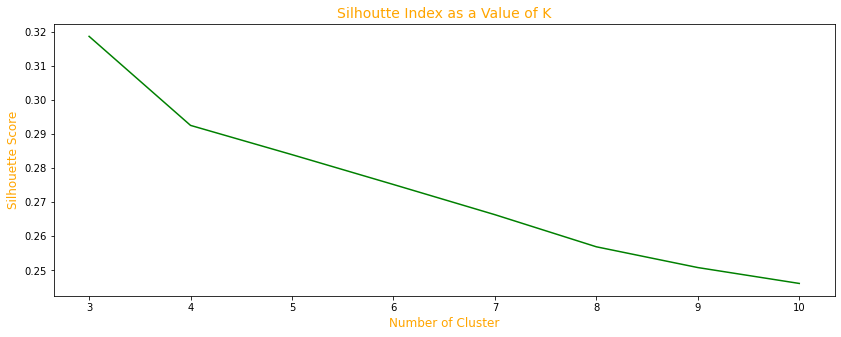

In [5]:
# plot the Silhoutte index as function of k here.

def cluster_silhouette(k, df):
    silhouette_coeffs = []
    for i in range(3, k + 1):
        KMean = KMeans(n_clusters=i)
        KMean.fit(df)
        label = KMean.predict(df)
        score = silhouette_score(df, label)
        silhouette_coeffs.append(score)
    return silhouette_coeffs

k_value = 10

plt.figure(figsize=(14,5))
plt.plot(np.arange(3, k_value + 1), cluster_silhouette(k_value, activities), c='green')
plt.title(label="Silhoutte Index as a Value of K", fontsize=14, color="orange")
plt.ylabel(ylabel="Silhouette Score", fontsize=12, color="orange")
plt.xlabel(xlabel="Number of Cluster", fontsize=12, color="orange")


* Compute the Silhoutte index with other values of $k$ (ex. $k \in [3, 5, ..., 10]$ ) to find the most optimal number of cluster for partitioning the data. You can use the Silhouette index implemented in `Scikit-Learn`

Plot you Silhoutte index as a value of $k$. 



* Use the `k-means` algorithm as implemented in the `scikit-learn`  to cluster activities data into the $k$ groups they belong to.


In [26]:
x = activities.transpose().to_numpy()
labels = KMeans(n_clusters=3).fit_predict(x)
labels = pd.DataFrame(labels)

# make a list of the indexes of items in each cluster
list_0 = labels.index[labels[0] == 0].tolist()
list_1 = labels.index[labels[0] == 1].tolist()
list_2 = labels.index[labels[0] == 2].tolist()

# separate values by cluster
cluster_0 = activities.iloc[:, list_0[0]:list_0[len(list_0)-1]+1]
cluster_1 = activities.iloc[:, list_1[0]:list_1[len(list_1)-1]+1]
cluster_2 = activities.iloc[:, list_2[0]:list_2[len(list_2)-1]+1]

Plot the time series using $k$ different colors, each representing one of the $k$ clusters. Your plot should look like the following althought the number of clusters (lines with different clusters) may be different.

 * For simplicity, this sample plot contains only a small subset of the data. You graph should contain all the data. 



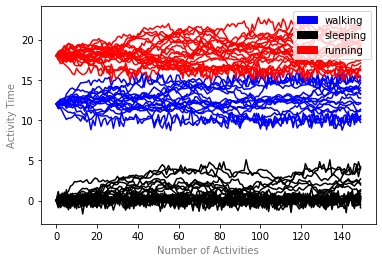

In [28]:
# plot the graph
ax = cluster_0.plot(legend=False, color='black')
ax = cluster_1.plot(legend=False, ax=ax, color='blue')
cluster_2.plot(legend=False, ax=ax, color='red')

#plot labels
plt.ylabel(ylabel="Activity Time", fontsize=10, color="grey")
plt.xlabel(xlabel="Number of Activities", fontsize=10, color="grey")

# plot the legend
walking = mpatches.Patch(color='blue', label='walking')
sleeping = mpatches.Patch(color='black', label='sleeping')
running = mpatches.Patch(color='red', label='running')
plt.legend(handles=[walking,sleeping,running], loc=1)
plt.show()

* Compute the average movement value for each cluster. 

In [30]:
cluster_0_mean = activities.iloc[:, list_0[0]:list_0[len(list_0)-1]+1].mean().mean()
cluster_1_mean = activities.iloc[:, list_1[0]:list_1[len(list_1)-1]+1].mean().mean()
cluster_2_mean = activities.iloc[:, list_2[0]:list_2[len(list_2)-1]+1].mean().mean()
print("1st Cluster: %0.3f \n2nd Cluster: %0.3f \n3rd Cluster: %0.3f" % (cluster_0_mean, cluster_1_mean, cluster_2_mean))

1st Cluster: 0.772 
2nd Cluster: 12.383 
3rd Cluster: 18.317


* Briefly describe how you could have used Gaussian Mixture models to cluster your data.


In [36]:
# Answer the quesiton above here
print("Above we calculated the average movement value of each activity. Based on those values, we can estimate the likelihood an activity belongs to a cluster using probability. Let's say we have an activity with movement value of 2, this activity is more likely to be part of the first cluster than the second or third one.")

Above we calculated the average movement value of each activity. Based on those values, we can estimate the likelihood an activity belongs to a cluster using probability. Let's say we have an activity with movement value of 2, this activity is more likely to be part of the first cluster than the second or third one.
